# **Libraries**

In [13]:
import os
from tqdm.notebook import tqdm
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.progress import track
from rich.layout import Layout
from rich.markdown import Markdown
import random

# **Downloading the dataset**

In [ ]:
ds = load_dataset("Nattakarn/fruit-and-vegetable-image-recognition")

README.md:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\USER\.cache\huggingface\hub\datasets--Nattakarn--fruit-and-vegetable-image-recognition. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00003.parquet:   0%|          | 0.00/428M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2492 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/623 [00:00<?, ? examples/s]

In [ ]:
target_dir = os.path.join(os.getcwd(), "complete_fruit_veg_dataset")
os.makedirs(target_dir, exist_ok=True)

train_dir = os.path.join(target_dir, "train")
test_dir = os.path.join(target_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

print("Extracting training images...")
for i, example in tqdm(enumerate(ds['train']), total=len(ds['train'])):
    image = example['image']
    label = example['label']
    
    label_dir = os.path.join(train_dir, f"class_{label}")
    os.makedirs(label_dir, exist_ok=True)
    
    if image.mode != 'RGB':
        image = image.convert('RGB')
        
    image_path = os.path.join(label_dir, f"img_{i}.jpg")
    image.save(image_path)

print("Extracting test images...")
for i, example in tqdm(enumerate(ds['test']), total=len(ds['test'])):
    image = example['image']
    label = example['label']
    
    label_dir = os.path.join(test_dir, f"class_{label}")
    os.makedirs(label_dir, exist_ok=True)
    
    if image.mode != 'RGB':
        image = image.convert('RGB')
        
    image_path = os.path.join(label_dir, f"img_{i}.jpg")
    image.save(image_path)

print(f"Complete dataset extracted to {target_dir}")

Extracting training images...


  0%|          | 0/2492 [00:00<?, ?it/s]

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Extracting test images...


  0%|          | 0/623 [00:00<?, ?it/s]

Complete dataset extracted to e:\AgriBot\Fruit-and-vegetable-image-recognition\complete_fruit_veg_dataset


─────────────────────────────── Dataset Analysis - Fruit and Vegetable Recognition ────────────────────────────────

                      Class Distribution Statistics                      
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Class ID ┃ Class Name    ┃ Training Samples ┃ Testing Samples ┃ Total ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│        0 │ apple         │               52 │              16 │    68 │
│        1 │ banana        │               55 │              20 │    75 │
│        2 │ beetroot      │               73 │              15 │    88 │
│        3 │ bell pepper   │               75 │              15 │    90 │
│        4 │ cabbage       │               74 │              18 │    92 │
│        5 │ capsicum      │               72 │              17 │    89 │
│        6 │ carrot        │               67 │              15 │    82 │
│        7 │ cauliflower   │               65 │              14 │    79 │
│        8 │ chilli pepper │               68 │              19 │    87 │
│        9 │ corn          │               66 │              21 │    87 │
│       10 │ cucumber      │               69 │              25 │    94 │
│       11 │ eggplant      │               70 │              14 │    84 │
│       12 │ garlic        │               76 │              16 │    92 │
│       13 │ ginger        │               53 │              15 │    68 │
│       14 │ grapes        │               78 │              22 │   100 │
│       15 │ jalepeno      │               73 │              15 │    88 │
│       16 │ kiwi          │               73 │              15 │    88 │
│       17 │ lemon         │               64 │              18 │    82 │
│       18 │ lettuce       │               77 │              20 │    97 │
│       19 │ mango         │               68 │              18 │    86 │
│       20 │ onion         │               75 │              19 │    94 │
│       21 │ orange        │               56 │              13 │    69 │
│       22 │ paprika       │               69 │              14 │    83 │
│       23 │ pear          │               73 │              16 │    89 │
│       24 │ peas          │               82 │              18 │   100 │
│       25 │ pineapple     │               80 │              19 │    99 │
│       26 │ pomegranate   │               68 │              11 │    79 │
│       27 │ potato        │               60 │              17 │    77 │
│       28 │ raddish       │               63 │              18 │    81 │
│       29 │ soy beans     │               78 │              19 │    97 │
│       30 │ spinach       │               71 │              26 │    97 │
│       31 │ sweetcorn     │               80 │              11 │    91 │
│       32 │ sweetpotato   │               56 │              13 │    69 │
│       33 │ tomato        │               70 │              22 │    92 │
│       34 │ turnip        │               82 │              16 │    98 │
│       35 │ watermelon    │               61 │              23 │    84 │
│    Total │               │             2492 │             623 │  3115 │
└──────────┴───────────────┴──────────────────┴─────────────────┴───────┘

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Generating class distribution visualizations...                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

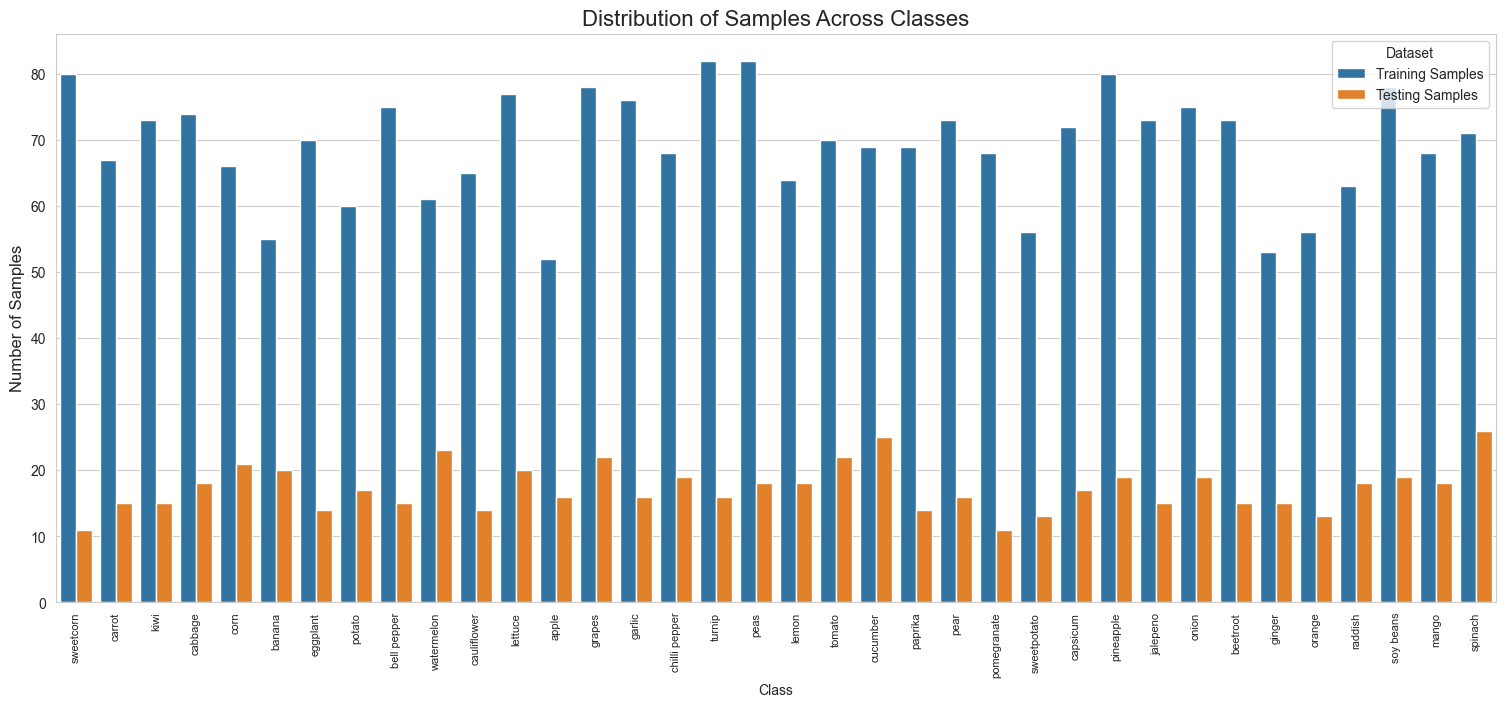

Class distribution plot saved to: e:\AgriBot\Fruit-and-vegetable-image-recognition\class_distribution.png

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Displaying sample images from each class...                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

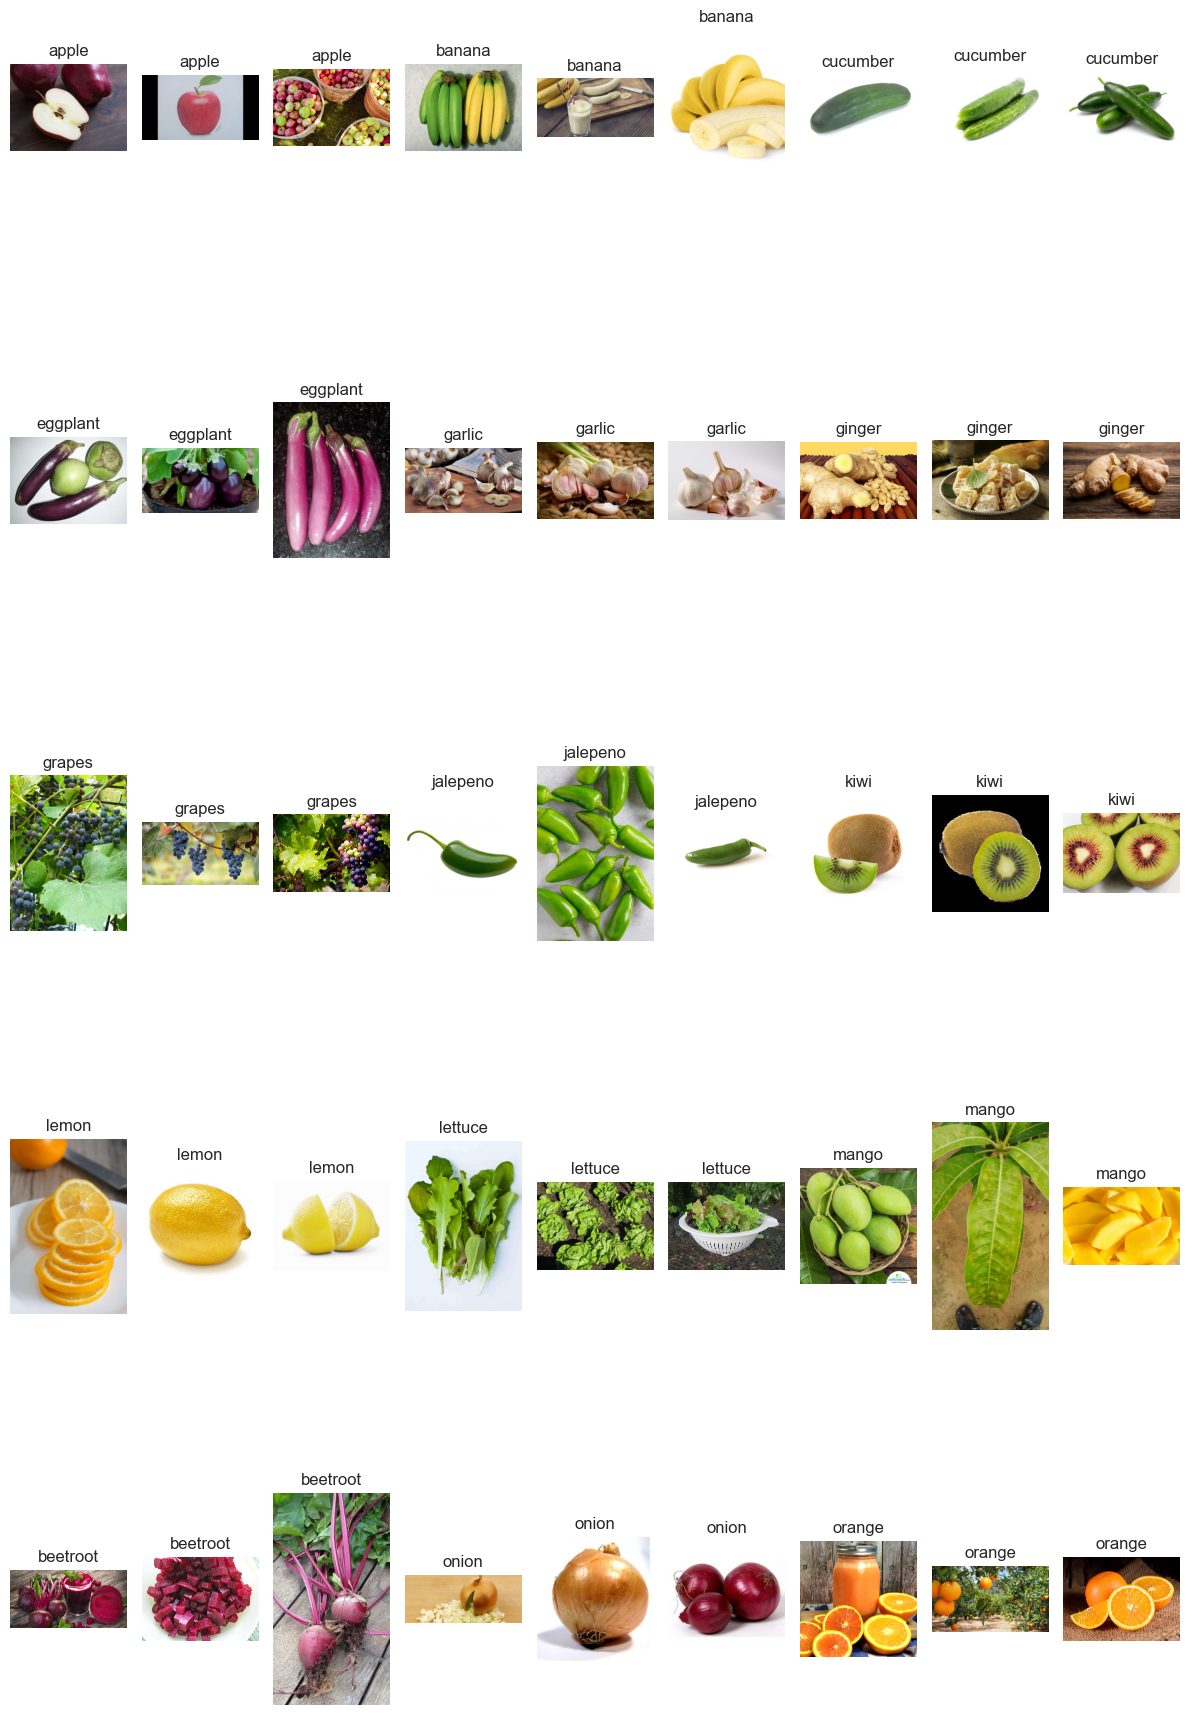

Sample images plot saved to: e:\AgriBot\Fruit-and-vegetable-image-recognition\sample_images.png

Dataset Summary                                                  

 • Total classes: 36                                                                                               
 • Total training images: 2492                                                                                     
 • Total testing images: 623                                                                                       
 • Total images: 3115                                                                                              
 • Image format: RGB                                                                                               
 • Storage location: e:\AgriBot\Fruit-and-vegetable-image-recognition\complete_fruit_veg_dataset

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Analysis Complete                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [15]:
console = Console()

def get_class_names(dataset):
    try:
        return dataset['train'].features['label'].names
    except (AttributeError, KeyError):
        return [f"Class {i}" for i in sorted(set(dataset['train']['label']))]

def count_samples_per_class(dataset, split='train'):
    labels = dataset[split]['label']
    return dict(Counter(labels))

console.rule("[bold blue]Dataset Analysis - Fruit and Vegetable Recognition[/]", style="blue")

class_names = get_class_names(ds)
train_counts = count_samples_per_class(ds, 'train')
test_counts = count_samples_per_class(ds, 'test')

table = Table(title="Class Distribution Statistics")
table.add_column("Class ID", justify="right", style="cyan")
table.add_column("Class Name", style="green")
table.add_column("Training Samples", justify="right", style="yellow")
table.add_column("Testing Samples", justify="right", style="yellow")
table.add_column("Total", justify="right", style="magenta")

total_train = 0
total_test = 0

for i in range(len(class_names)):
    class_name = class_names[i] if i < len(class_names) else f"Class {i}"
    train_count = train_counts.get(i, 0)
    test_count = test_counts.get(i, 0)
    total = train_count + test_count
    
    total_train += train_count
    total_test += test_count
    
    table.add_row(
        str(i),
        class_name,
        str(train_count),
        str(test_count),
        str(total)
    )

table.add_row(
    "Total", 
    "", 
    str(total_train), 
    str(total_test), 
    str(total_train + total_test),
    style="bold"
)

console.print(table)

console.print(Panel("[bold green]Generating class distribution visualizations...[/]"))

plt.figure(figsize=(15, 8))
df = pd.DataFrame({
    'Class': [class_names[i] if i < len(class_names) else f"Class {i}" for i in train_counts.keys()],
    'Training Samples': list(train_counts.values()),
    'Testing Samples': [test_counts.get(i, 0) for i in train_counts.keys()]
})

df_long = pd.melt(df, id_vars=['Class'], var_name='Dataset', value_name='Count')

sns.set_style("whitegrid")
ax = sns.barplot(x='Class', y='Count', hue='Dataset', data=df_long)
plt.title('Distribution of Samples Across Classes', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Number of Samples', fontsize=12)

plt.tight_layout(pad=0.5)
plt.subplots_adjust(bottom=0.25)


distribution_path = os.path.join(os.getcwd(), "class_distribution.png")
plt.savefig(distribution_path, bbox_inches='tight')
plt.show()

console.print(f"[bold green]Class distribution plot saved to:[/] {distribution_path}")

console.print(Panel("[bold green]Displaying sample images from each class...[/]"))

def get_sample_images(base_dir, n_samples=3):
    samples = {}
    for class_dir in os.listdir(base_dir):
        if class_dir.startswith("class_"):
            class_id = int(class_dir.split("_")[1])
            class_path = os.path.join(base_dir, class_dir)
            
            if os.path.isdir(class_path):
                image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
                
                if image_files:
                    selected_images = random.sample(image_files, min(n_samples, len(image_files)))
                    samples[class_id] = [os.path.join(class_path, img) for img in selected_images]
    
    return samples

def plot_sample_images(samples, class_names, rows=5):
    n_classes = len(samples)
    cols = 3  # number of samples per class

    rows = min(rows, (n_classes + 2) // 3)
    
    plt.figure(figsize=(12, rows * 4))
    
    for i, (class_id, image_paths) in enumerate(list(samples.items())[:rows*3]):
        class_name = class_names[class_id] if class_id < len(class_names) else f"Class {class_id}"
        
        for j, img_path in enumerate(image_paths[:cols]):
            plt.subplot(rows, cols * 3, i * cols + j + 1)
            img = Image.open(img_path)
            plt.imshow(np.array(img))
            plt.title(f"{class_name}")
            plt.axis('off')
    
    plt.tight_layout()
    
    
    samples_path = os.path.join(os.getcwd(), "sample_images.png")
    plt.savefig(samples_path)
    plt.show()
    
    return samples_path


train_samples = get_sample_images(train_dir)
samples_path = plot_sample_images(train_samples, class_names)

console.print(f"[bold green]Sample images plot saved to:[/] {samples_path}")


dataset_summary = f"""
## Dataset Summary
- Total classes: {len(class_names)}
- Total training images: {total_train}
- Total testing images: {total_test}
- Total images: {total_train + total_test}
- Image format: RGB
- Storage location: {os.path.abspath(target_dir)}
"""

console.print(Markdown(dataset_summary))

console.print(Panel("[bold blue]Analysis Complete[/]", style="blue"))